In [11]:
data_directory="data"
directory="/Users/amaiasagastimartinez/Desktop/SENS-Soundlights/code/sens-sensor"#path/to/sens-sensor"
print(f"Data directory is {data_directory}")
print(f"Working directory is {directory}")

Data directory is data
Working directory is /Users/amaiasagastimartinez/Desktop/SENS-Soundlights/code/sens-sensor


In [12]:
import os
import numpy as np
import pandas as pd
from scipy.io import wavfile
import matplotlib.pyplot as plt

# Set the working directory
import os
os.chdir(directory)

# Imports from this project
from development.lib.auxiliars import USM_sources, USM_sound_assigns

In [13]:
def Leq_funct(vect, pref, calibration):
    rms=np.sqrt(np.mean(vect**2))
    Leq=20*np.log(rms/pref)
    return Leq

In [14]:
# Define the path to the folder containing the files
folder_paths = ['USM/val', 'USM/eval', 'USM/train']
numbers=[2000,2000,20000]
airplane_leq=[]
car_leq=[]
helicopter_leq=[]
motorcycle_leq=[]
train_leq=[]
truck_leq=[]

for i,folder_path in enumerate(folder_paths):
    number=numbers[i]

    # Complete path
    folder_path=os.path.join(data_directory, folder_path)

    # List all files in the directory
    all_files = os.listdir(folder_path)

    # Iterate over all files in the directory
    for file_name in all_files:
        if file_name.endswith("_mix_target.npy"):
            # Construct the full path to the file
            file_path = os.path.join(folder_path, file_name)
            # Load the data
            data = np.load(file_path)
            
            # Get the names where the vector value is 1
            selected_names = [name for value, name in zip(data, USM_sources) if value == 1]

            if ('airplane' in selected_names or 'car' in selected_names or 'helicopter' in selected_names or 'motorcycle' in selected_names or 'train' in selected_names or 'truck' in selected_names):
                
                # Import corresponding audio
                audio_file_path= os.path.join(folder_path,file_name.split("_")[0]+"_mix.wav")

                # Load data from .pkl file
                sample_rate, audio_data = wavfile.read(audio_file_path)
                audio_data = audio_data / 32767.0  # Normalize by the maximum value for int16

                # Calculate Leq
                pref=20*10-6
                mic_calib=1
                Leq_calc=Leq_funct(audio_data, pref, mic_calib)    

                if('airplane' in selected_names):
                    airplane_leq.append(Leq_calc)

                if ('car' in selected_names):
                    car_leq.append(Leq_calc)
                
                if ('helicopter' in selected_names):
                    helicopter_leq.append(Leq_calc)

                if ('motorcycle' in selected_names):
                    motorcycle_leq.append(Leq_calc)

                if ('train' in selected_names):
                    train_leq.append(Leq_calc)

                if ('truck' in selected_names):
                    truck_leq.append(Leq_calc)



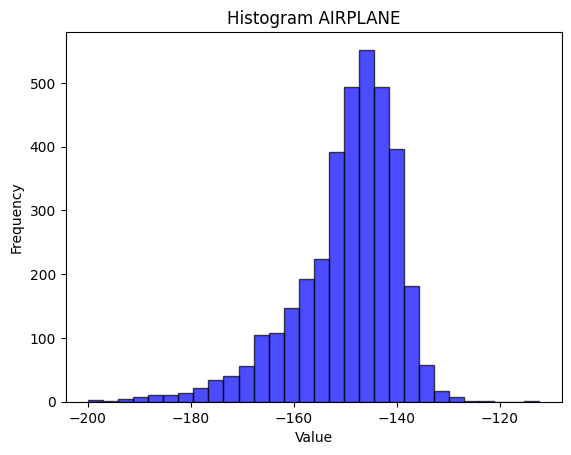

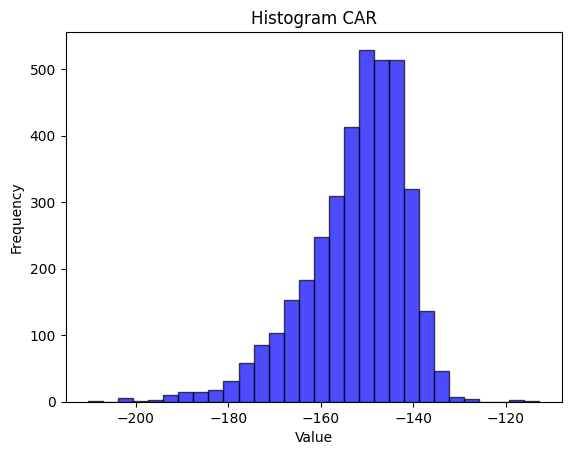

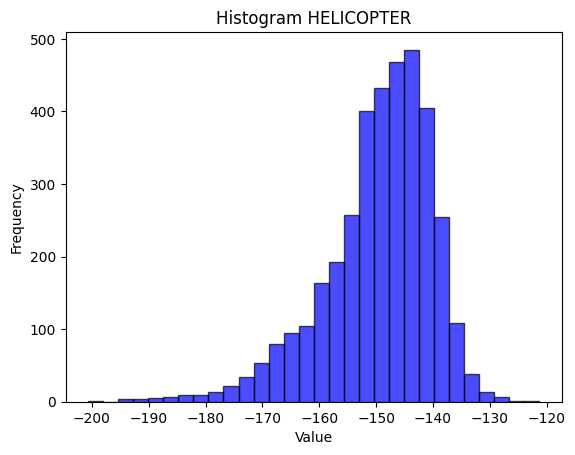

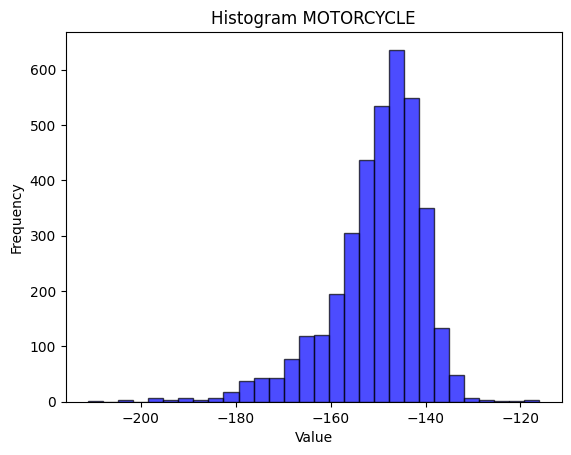

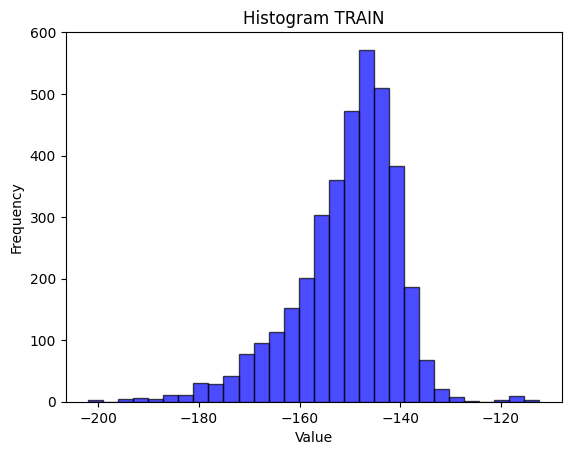

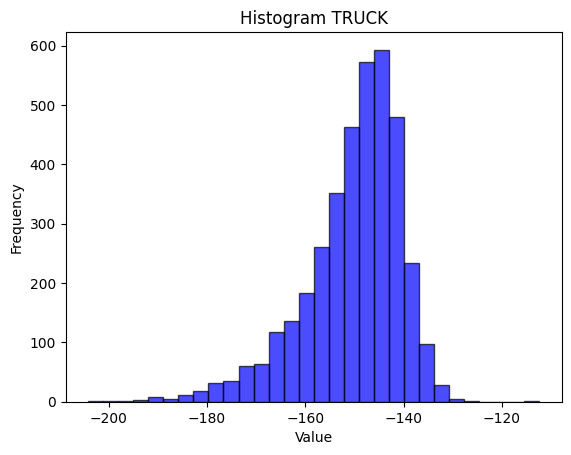

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# AIRPLANE ########################################
# Plot histogram
plt.hist(airplane_leq, bins=30, color='blue', alpha=0.7, edgecolor='black')

# Add labels and title
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram AIRPLANE")

# Show the plot
plt.show()

# CAR ########################################
# Plot histogram
plt.hist(car_leq, bins=30, color='blue', alpha=0.7, edgecolor='black')

# Add labels and title
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram CAR")

# Show the plot
plt.show()

# HELICOPTER ########################################
# Plot histogram
plt.hist(helicopter_leq, bins=30, color='blue', alpha=0.7, edgecolor='black')

# Add labels and title
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram HELICOPTER")

# Show the plot
plt.show()

# MOTORCYCLE ########################################
# Plot histogram
plt.hist(motorcycle_leq, bins=30, color='blue', alpha=0.7, edgecolor='black')

# Add labels and title
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram MOTORCYCLE")

# Show the plot
plt.show()

# TRAIN ########################################
# Plot histogram
plt.hist(train_leq, bins=30, color='blue', alpha=0.7, edgecolor='black')

# Add labels and title
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram TRAIN")

# Show the plot
plt.show()

# TRUCK ########################################
# Plot histogram
plt.hist(truck_leq, bins=30, color='blue', alpha=0.7, edgecolor='black')

# Add labels and title
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram TRUCK")

# Show the plot
plt.show()
